#Thông tin sinh viên:

Họ tên: Huỳnh Võ Ngọc Thanh

MSSV: 21520449

#Bài 3: Sử dụng Numpy xây dựng phương pháp Softmax Regression và Gradient Descent. Tiến hành huấn luyện phương pháp Logistic Regression và trực quan hoá giá trị của hàm loss trong toàn bộ quá trình huấn luyện.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

#Loading data:

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DS102 TH/Lab3/data.csv", sep=";")

In [ ]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
data.shape

(4424, 37)

In [ ]:
data.isna().sum(axis="index")

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [ ]:
data = data.dropna()

In [ ]:
data.duplicated().any()

False

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

#Chuyển đổi cột mục tiêu về dạng số:

Enrolled: 0

Dropout: 1

Graduate: 2

In [ ]:
def LabelEncoder (val:str) -> int:
  if val=="Enrolled":
    return 0

  elif val=="Dropout":
    return 1

  return 2

In [ ]:
data["Target"] = data["Target"].apply(LabelEncoder)
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


#Biểu đồ cho thấy số lượng nhãn ở 3 lớp

Text(0.5, 1.0, 'Number of samples of each class')

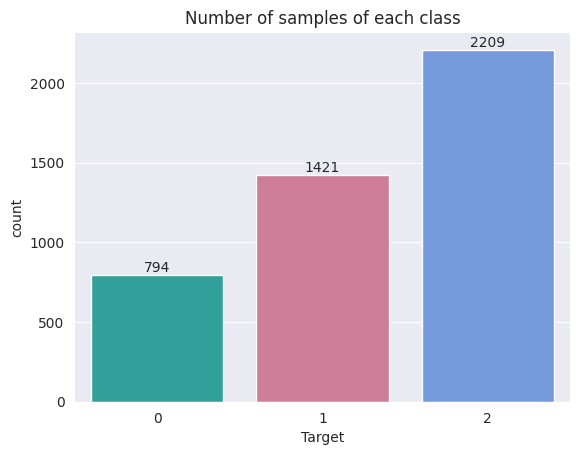

In [ ]:
ax = sns.set_style(style='darkgrid')
palette = {0.0: 'lightseagreen', 1.0: 'palevioletred', 2.0:'cornflowerblue'}
ax = sns.countplot(data=data, x = 'Target', palette = palette)
ax.bar_label(ax.containers[0])
plt.title("Number of samples of each class")

In [ ]:
X = data.iloc[:, :-1]
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [ ]:
y = data.iloc[:, -1]
y.head()

0    1
1    2
2    1
3    2
4    2
Name: Target, dtype: int64

In [ ]:
X = np.array(X)
y = np.array(y)

#Chia dữ liệu thành tập train và test:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Chuẩn hóa dữ liệu trên tập X:

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[ 4.76915307, -0.67347927, -0.55749616, ..., -0.17355626,
        -0.46134859,  0.88478423],
       [-0.29476314,  1.16157067, -0.55749616, ..., -0.17355626,
        -0.46134859,  0.88478423],
       [-0.29476314, -1.01755114,  3.23669405, ..., -0.28596761,
         0.11873318,  0.76159704],
       ...,
       [-0.29476314, -1.01755114, -0.55749616, ...,  0.42597092,
         1.7864683 , -0.75184569],
       [-0.29476314, -1.01755114,  1.71901797, ..., -0.17355626,
        -0.46134859,  0.88478423],
       [-0.29476314, -0.04268086,  0.20134188, ...,  0.87561631,
        -1.1139406 ,  0.34364047]])

In [ ]:
X_test

array([[ 4.76915307,  1.16157067, -0.55749616, ..., -0.17355626,
        -0.46134859,  0.88478423],
       [-0.29476314, -0.10002617, -0.55749616, ...,  1.73743664,
        -0.67887926, -0.40868135],
       [-0.29476314, -0.10002617, -0.55749616, ...,  1.73743664,
        -0.67887926, -0.40868135],
       ...,
       [-0.29476314, -0.10002617, -0.55749616, ...,  0.31355958,
        -0.53385882,  0.78359475],
       [-0.29476314, -1.01755114,  0.20134188, ..., -0.17355626,
        -0.46134859,  0.88478423],
       [-0.29476314, -1.01755114,  1.71901797, ..., -0.28596761,
         0.11873318,  0.76159704]])

#Xây dựng mô hình SoftmaxRegression và Gradient Descent:

In [ ]:
from tqdm import tqdm

class SoftmaxRegression:
    def __init__(self, epoch: int, lr: float, num_classes: int) -> None:
        self.epoch = epoch
        self.lr = lr
        self.num_classes = num_classes
        self.losses = []
        self.metrics = []

    def softmax(self, z: np.ndarray) -> np.ndarray:
        return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

    def loss_func(self, y: np.ndarray, y_hat: np.ndarray, epsilon=1e-15):
        clipped_y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
        return -(y * np.log(clipped_y_hat)).mean()

    def one_hot_encoding(self, y):
        return np.eye(self.num_classes)[y]

    def accuracy(self, y: np.ndarray, y_hat: np.ndarray):
        return (1 - np.abs(y - y_hat)).mean()

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        m = X.shape[0]
        d = X.shape[1]
        self.theta = np.zeros((d, self.num_classes))

        y_one_hot = self.one_hot_encoding(y)

        with tqdm(range(self.epoch)) as pb:
            for e in pb:
                pb.set_description(f"Epoch {e+1}")
                z = np.matmul(X, self.theta)

                diff = self.softmax(z) - y_one_hot
                gradient = 1/m * np.matmul(X.T, diff)
                self.theta = self.theta - self.lr * gradient

                # evaluate
                loss = self.loss_func(y_one_hot, self.softmax(z))
                acc = self.accuracy(y_one_hot, self.softmax(z))
                pb.set_postfix({"loss": loss, "acc": acc})
                self.losses.append(loss)
                self.metrics.append(acc)

    def predict(self, X: np.ndarray) -> np.ndarray:
        z = np.matmul(X, self.theta)
        y_hat = self.softmax(z)
        return y_hat

#Huấn luyện mô hình:

hiển thị độ mất mát (loss) và độ chính xác (acc)

In [ ]:
sm_reg = SoftmaxRegression(epoch=500, lr=0.05, num_classes=3)
sm_reg.fit(X_train, y_train)

Epoch 500: 100%|██████████| 500/500 [00:05<00:00, 90.19it/s, loss=0.19, acc=0.775]


In [ ]:
sm_reg.theta

array([[-0.02686803, -0.04580047,  0.0726685 ],
       [ 0.05719282,  0.02102205, -0.07821487],
       [-0.01959977,  0.04206294, -0.02246317],
       [ 0.03587254,  0.34453006, -0.38040259],
       [ 0.0188149 ,  0.01180267, -0.03061757],
       [-0.03357706, -0.04261268,  0.07618974],
       [-0.02525828,  0.02783053, -0.00257224],
       [-0.01768799,  0.07415677, -0.05646878],
       [-0.09929423,  0.06260541,  0.03668882],
       [-0.0097289 , -0.02630833,  0.03603723],
       [ 0.06885186, -0.11235396,  0.0435021 ],
       [ 0.02936246, -0.04226363,  0.01290117],
       [-0.04140842, -0.04016847,  0.08157689],
       [-0.05459554,  0.07239232, -0.01779678],
       [-0.00603925,  0.01183968, -0.00580044],
       [ 0.06173562,  0.14012498, -0.20186059],
       [ 0.01153339, -0.51792612,  0.50639272],
       [ 0.01508169,  0.09141902, -0.10650071],
       [-0.06714842, -0.15017889,  0.21732732],
       [-0.09141684,  0.21575412, -0.12433728],
       [ 0.01349967, -0.1111516 ,  0.097

In [ ]:
y_proba = sm_reg.predict(X_test)
y_proba

array([[0.40775218, 0.58650597, 0.00574184],
       [0.27578645, 0.09318546, 0.63102809],
       [0.08872804, 0.04125339, 0.87001856],
       ...,
       [0.20164984, 0.07801686, 0.7203333 ],
       [0.20828234, 0.05347471, 0.73824295],
       [0.06456742, 0.03050474, 0.90492785]])

#Trực quan hóa độ chính xác của mô hình trong quá trình training:

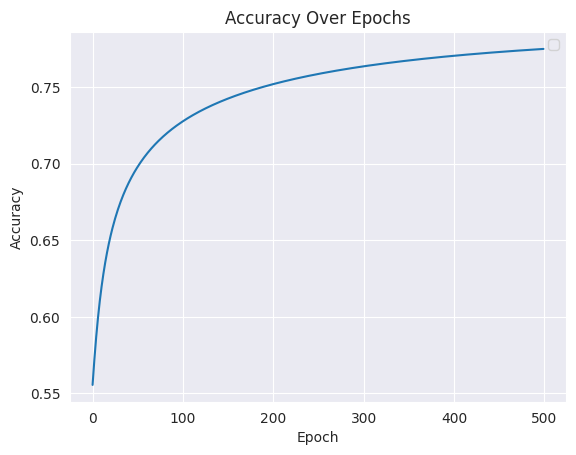

In [ ]:
plt.plot(sm_reg.metrics)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()

#Trực quan hóa giá trị hàm mất mát trong quá trình training:

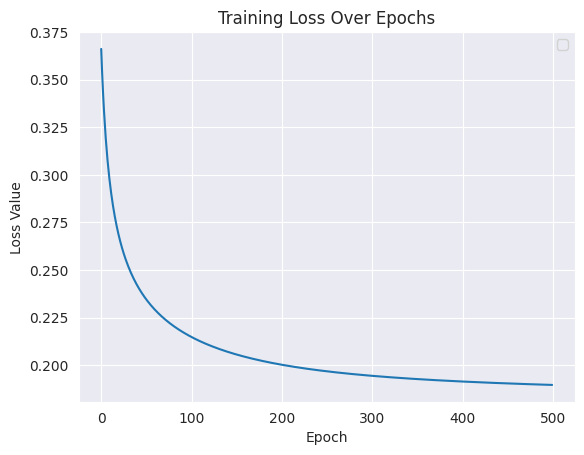

In [ ]:
plt.plot(sm_reg.losses)
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()